

김영석님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv




In [1]:
# 데이터 업로드
import pandas as pd
#df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

#print(df.info())



df=  pd.read_csv('/content/ai18_kys_230309_EDA_complete.csv')
# 필요없는 열 삭제
del df['Unnamed: 0']

## * Data Description
Name : 게임의 이름입니다.(object)

Platform : 게임이 지원되는 플랫폼의 이름입니다.(object)

Year : 게임이 출시된 연도입니다. (int)

Genre : 게임의 장르입니다.(object)

Publisher : 게임을 배급한 회사입니다.(object)

NA_Sales : 북미지역에서의 출고량입니다.(float)

EU_Sales : 유럽지역에서의 출고량입니다.(float)

JP_Sales : 일본지역에서의 출고량입니다.(float)

Other_Sales : 기타지역에서의 출고량입니다.(float)

위와 같이 데이터 프레임 내 항목들을 재정의

**결측치를 우선 제거한 후 이상치를 확인할 예정**

In [ ]:
# 결측치 행을 전부 보기위해 한번 실행
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

# 행 전부보기 해제
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

# 결측 데이터 확인, 모든 열에서 하나의 결측치라도 존재할 경우
#df_nan_all = df[df.isnull().any(axis=1)]
#df_nan_all # 357개 데이터에서 nan 이 확인

# 그럼 이 데이터를 모두 지우는 것이 맞는가?
# 비즈니스 인사이트 목표는 '다음 분기에 어떤 게임을 설계해야 하는가' 에 대한 결론을 내야 하므로 Name, platform, Genre, year 가 nan 인 값은 삭제하도록 한다.
# 위 4개 컬럼은 인사이트 목표를 도출하는데 필요한 키값이며 특정 값으로 대체 불가능하기에 없으면 삭제하도록 결정

# Name
#print(df[df['Name'].isnull()]) # Name 은 없음

# Platform
#print(df[df['Platform'].isnull()]) # Platform 은 없음

# Genre
#print(df[df['Genre'].isnull()]) 
#print(df['Genre'].isnull().sum()) # 50 개 검출
# Year
#print(df[df['Year'].isnull()]) # 271 개 검출
# 321개를 삭제할 예정



df = df.dropna(subset=['Genre'])
df = df.dropna(subset=['Year'])


# 16598 - 16277 = 321 개 삭제 완료
# 이상치 제거 전 nan 값 제거 백업 
# df_nan_del = df
# Publisher Nan 값 확인, # Publisher 는 인사이트 도출에 크게 영향을 미치지 않기에  Unknown 으로 대체
df['Publisher'] = df['Publisher'].fillna('Unknown')
df[df.isnull().any(axis=1)]

# 아래부터는 이상치 및 데이터 셋 변경작업 진행


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


# * 결측치 제거 결론 

비즈니스 인사이트 목표는 '다음 분기에 어떤 게임을 설계해야 하는가' 에 대한 결론을 내야 하므로 

Name, platform, Genre, year 

위 4개 컬럼은 인사이트 목표를 도출하는데 필요한 키값이며 특정 값으로 대체 불가능하기에 없으면 삭제하도록 결정

In [ ]:
# 이상치 제거
import numpy as np
#Platform 이상치 확인
#Platform_counts = df['Platform'].value_counts()
#print(Platform_counts)
#Platform 이상치 이상없음

# Year 이상치 확인
# Year_counts = df['Year'].value_counts()
# print(Year_counts)
# 이상치 발견 연도가 이상한 데이터 발견
# 추가확인, describe를 사용하여 25% 이하 수치가 2003인 것을 확인, 2003 기준으로 그 이하 데이터 중 연도가 이상한 데이터 추출
# 1980년 아래로 이상치 임을 확인 후 제거
#df.drop(df[df['Year'] <= 1979].index, inplace=True)

# Year 이상치 제거 후 백업
#df_year_del = df

# Year의 데이터형태를 float -> int로 변경
# df['Year'] = df['Year'].astype(int)

# Genre 데이터 이상치 확인
#df['Genre'].value_counts()
# Genre 데이터 이상치 없음

# Publisher
#df['Publisher'].value_counts()

#작업한거 내려받기
#df.to_csv("ai18_section1_kys.csv")




In [ ]:
# 이제 NA_Sales, EU_Sales, JP_Sales, Other_Sales 에서, k, m등 숫자가 아닌 문자열 확인
# 출고량들의 기본단위는 M 이라 판단, sales에서 M이 붙어있을 경우 숫자만 남기고 문자열 M은 삭제, K는 0.001 을 곱한 것으로 업데이트
import re
# 문자열에서 숫자 부분 추출하여 값을 계산하는 함수
def convert_k_m_str_to_int(string):
    if 'K' in string:
        multiplier = 0.001
    elif 'M' in string:
        multiplier = 1
    else:
        multiplier = 1
    num_str = string.replace('K', '').replace('M', '')
    num = float(num_str)
    result = float(num * multiplier)
    return result

# 업데이트 
#df['NA_Sales'] = df['NA_Sales'].apply(convert_k_m_str_to_int)
#df['EU_Sales'] = df['EU_Sales'].apply(convert_k_m_str_to_int)
#df['JP_Sales'] = df['JP_Sales'].apply(convert_k_m_str_to_int)
#df['Other_Sales'] = df['Other_Sales'].apply(convert_k_m_str_to_int)
#df.to_csv("ai18_kys_230309.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 0 to 16176
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  int64  
 3   Genre        16177 non-null  object 
 4   Publisher    16177 non-null  object 
 5   NA_Sales     16177 non-null  float64
 6   EU_Sales     16177 non-null  float64
 7   JP_Sales     16177 non-null  float64
 8   Other_Sales  16177 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


위 과정까지 하여 결측치와 이상치를 제거하였고 데이터 형태까지 변경 완료하였다

다음은 중복값을 찾아 제거하는 과정

In [ ]:
# 중복값의 경우 이름,플랫폼, 년도, 장르까지 똑같은 것을 선택
#duplicates = df[df.duplicated(['Name', 'Platform', 'Year', 'Genre'])]
#print(duplicates)
#데이터 확인결과, 'Madden NFL 13' 에서 플랫폼이 ps3인것이 중복된다.
#df.loc[df['Name'] == 'Madden NFL 13']



print(df.shape) # 16177 row
# 이름,플랫폼, 년도, 장르까지 똑같은 행의 출고량을 전부 합친다.인덱스 재정렬까지
df = df.groupby(['Name','Platform', 'Year', 'Genre']).sum().reset_index()
print(df.shape) # 16176 row


# 중복값 없어졌는지 확인, 0.23 / 0.01 이 0.24 한줄로 합쳐짐
#df.loc[df['Name'] == 'Madden NFL 13']

df.info()
# 데이터 csv로 보관
#df.to_csv("ai18_kys_230309_EDA_complete.csv")


(16176, 8)
(16176, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16176 entries, 0 to 16175
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16176 non-null  object 
 1   Platform     16176 non-null  object 
 2   Year         16176 non-null  int64  
 3   Genre        16176 non-null  object 
 4   NA_Sales     16176 non-null  float64
 5   EU_Sales     16176 non-null  float64
 6   JP_Sales     16176 non-null  float64
 7   Other_Sales  16176 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1011.1+ KB


In [ ]:
# 권구현님 플랫폼 작업 인용
company_dict = {'DS': 'Nintendo', 'Wii': 'Nintendo', 'PSP': 'Sony', 'PS3': 'Sony', 'PC': 'PC', 
                'PS': 'Sony', 'GBA': 'Nintendo', 'PS4': 'Sony', 'PS2': 'Sony', 'XB': 'Microsoft', 
                'X360': 'Microsoft', 'GC': 'Nintendo', '3DS': 'Nintendo', '2600': 'Atari', 'SAT': 'Sega',
                'GB': 'Nintendo', 'NES': 'Nintendo', 'DC': 'Sega', 'N64': 'Nintendo', 'XOne': 'Microsoft',
                'SNES': 'Nintendo', 'WiiU': 'Nintendo', 'PSV': 'Sony', 'GEN': 'Sega', 'SCD': 'Sega',
                'WS': 'Bandai', 'NG': 'SNK', 'TG16': 'NEC', '3DO': 'Panasonic', 'GG': 'Sega', 'PCFX': 'NEC'}
df['Comp'] = df['Platform'].map(company_dict)


,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Comp
0,'98 Koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,Sony
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,Sony
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,Sony
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,0.00,0.00,0.16,0.00,Sony
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,0.00,0.00,0.17,0.00,Sony
...,...,...,...,...,...,...,...,...,...
16171,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.00,Nintendo
16172,uDraw Studio,Wii,2010,Misc,1.67,0.58,0.00,0.20,Nintendo
16173,uDraw Studio: Instant Artist,Wii,2011,Misc,0.08,0.09,0.00,0.02,Nintendo
16174,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,Microsoft


위의 과정을 통해 데이터 전처리를 완료하였다

# 전처리 요약

1. 원본 데이터 업로드 후 필요없는 Unnamed 열 삭제
2. 결측치 행을 먼저 확인 후 대체 불가능한 Name, platform, Genre, year 가 nan 인 값은 삭제. 단 Publisher Nan 값 확인이 되었으나 Publisher 는 인사이트 도출에 크게 영향을 미치지 않기에 Unknown 으로 대체
3. 이상치 데이터는 Year컬럼과 출고량 데이터에서 발견
 - year데이터에서는 describe를 통해 연도별 분포를 확인하여 1979년 이하 데이터는 유효하지 않는 데이터라 확인하여 삭제처리 진행, 데이터 형은 int 로 변경
 - 출고량 데이터에 숫자가 아닌 형태(M, K)는 float형으로 바꿔주기위해 문자열에서 숫자부분을 추출하여 계산하는 방식의 함수를 사용하여 처리, csv에서 사용된 출고량의 기본 단위는 M이라 판단하여 K가 붙은 데이터는 0.001를 곱하고, M이 붙은 데이터는 문자열 만 제거, 완료 후 데이터 형태는 float로 변경
4. 중복 데이터 확인은 이름,플랫폼,년도,장르까지 모두 중복되는 것을 추출한 후 한줄로 sum처리를 진행



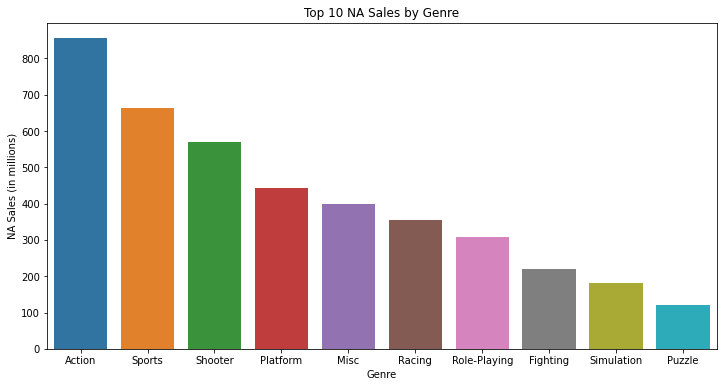

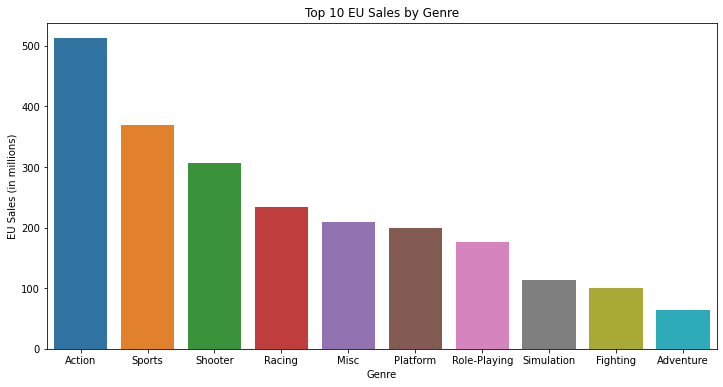

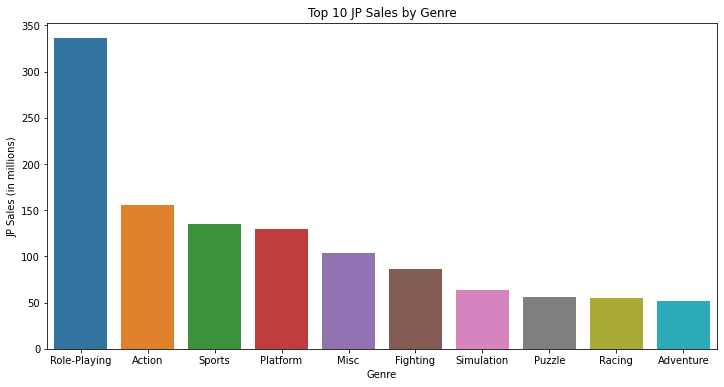

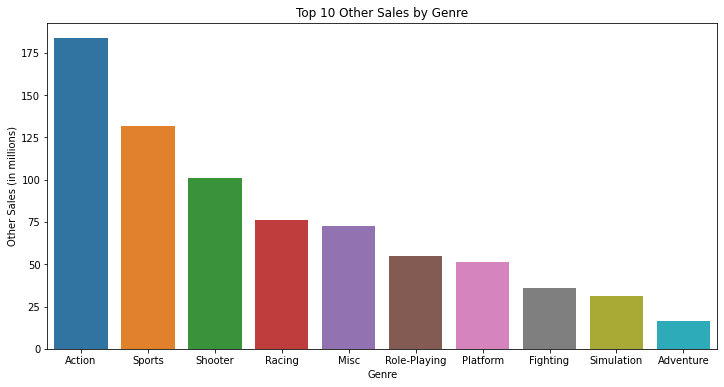

In [25]:
"""
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?

- 지역은 어떻게 구분했는지 설명함
- 지역별로 선호하는 게임의 장르를 파악함
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함
"""
import matplotlib.pyplot as plt
import seaborn as sns
# 지역별
# NA_Sales 기준으로 Genre을 Group By합니다.
Genre_grouped_NA = df.groupby("Genre")["NA_Sales"].sum().reset_index()
top_10_Genre_NA = Genre_grouped_NA.sort_values(by="NA_Sales", ascending=False).head(10)

# NA 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="NA_Sales", data=top_10_Genre_NA)
plt.title("Top 10 NA Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("NA Sales (in millions)")

plt.show()


# EA_Sales 기준으로 Platform을 Group By합니다.
Genre_grouped_EU = df.groupby("Genre")["EU_Sales"].sum().reset_index()
top_10_Genre_EU = Genre_grouped_EU.sort_values(by="EU_Sales", ascending=False).head(10)

# EA 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="EU_Sales", data=top_10_Genre_EU)
plt.title("Top 10 EU Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("EU Sales (in millions)")

plt.show()


# EA_Sales 기준으로 Platform을 Group By합니다.
Genre_grouped_JP = df.groupby("Genre")["JP_Sales"].sum().reset_index()
top_10_Genre_JP = Genre_grouped_JP.sort_values(by="JP_Sales", ascending=False).head(10)

# EA 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="JP_Sales", data=top_10_Genre_JP)
plt.title("Top 10 JP Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("JP Sales (in millions)")

plt.show()


# Other_Sales 기준으로 Platform을 Group By합니다.
Genre_grouped_Other = df.groupby("Genre")["Other_Sales"].sum().reset_index()
top_10_Genre_Other = Genre_grouped_Other.sort_values(by="Other_Sales", ascending=False).head(10)

# Other 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="Other_Sales", data=top_10_Genre_Other)
plt.title("Top 10 Other Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Other Sales (in millions)")

plt.show()

# 1. 지역별로 선호하는 장르가 다른가
시각화를 통해 확인한 결과 지역별로 다르다는 결과를 도출해낼 수 있었다.
우선 지역별을 나누는 기준은 장르를 기준으로 NA_Sales, EU_Sales, JP_Sales, Other_Sales를 각각 집계하였다. 장르의 기준이 많아 판매량 순위 상위 10개만 추려 확인하였다.

일본지역을 제외한 다른 지역에서는 액션 장르를 제일 선호하는 것을 확인하였다.


